In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


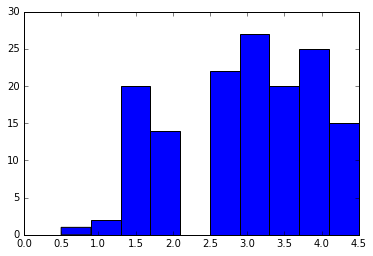

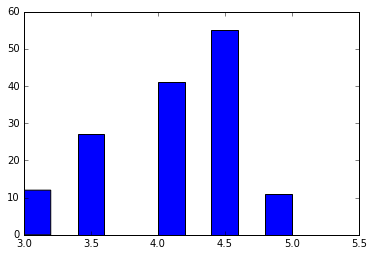

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(movies["Metacritic_norm_round"], 10)
plt.show()
plt.hist(movies["Fandango_Stars"], 10)
plt.show()


In [9]:
import numpy
mean_fs = movies["Fandango_Stars"].mean()
mean_mnr = movies["Metacritic_norm_round"].mean()
median_fs = movies["Fandango_Stars"].median()
median_mnr = movies["Metacritic_norm_round"].median()
std_fs = numpy.std(movies["Fandango_Stars"])
std_mnr = numpy.std(movies["Metacritic_norm_round"])
print(mean_fs)
print(mean_mnr)
print(median_fs)
print(median_mnr)
print(std_fs)
print(std_mnr)


4.08904109589
2.97260273973
4.0
3.0
0.53853216127
0.987561029704


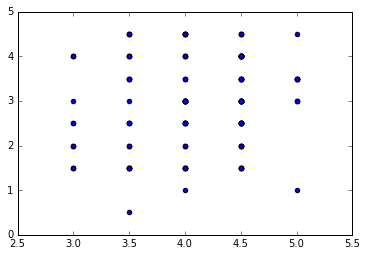

In [11]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

In [12]:
fs = movies["Fandango_Stars"]
mnr = movies["Metacritic_norm_round"]
movies["fm_diff"] = numpy.absolute(fs - mnr)
movies.sort_values(by = "fm_diff", ascending = False)
print(movies.head(5))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm   ...     RT_norm_round  RT_user_norm_round  \
0     3.70    

In [16]:
from scipy.stats import pearsonr

r, p_value = pearsonr(fs, mnr)
r

0.17844919073895918

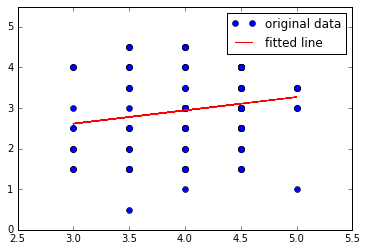

2.6162245228081531

In [41]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(fs,mnr)
plt.plot(fs, mnr, "o", label = "original data")
plt.axis([2.5, 5.5, 0, 5.5])

plt.plot(fs, intercept + slope*fs, "r", label="fitted line")
plt.legend()
plt.show()

pred_3 = 3 * slope + intercept
pred_3

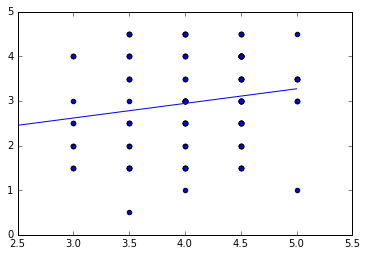

In [45]:

pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(fs, mnr)
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(2.5,5.5)
plt.show()